In [ ]:
!pip install faker

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker()

# Define number of records
num_transactions = 10000

# Generate synthetic transaction data
data = {
    "Transaction_ID": [f"T{i}" for i in range(num_transactions)],
    "Merchant_ID": [fake.uuid4()[:8] for _ in range(num_transactions)],
    "Transaction_Amount": np.random.uniform(10, 5000, num_transactions).round(2),
    "Transaction_Date": [fake.date_this_year() for _ in range(num_transactions)],
    "Merchant_Category": np.random.choice(['Retail', 'Travel', 'Food Services', 'E-commerce'], num_transactions),
    "Region": np.random.choice(['North America', 'Europe', 'Asia', 'South America'], num_transactions),
    "Fraud_Risk": np.random.uniform(0, 1, num_transactions).round(2),
    "Fee_Percentage": np.random.uniform(1.0, 3.5, num_transactions).round(2)
}

df = pd.DataFrame(data)
df.to_csv("visa_pricing_data.csv", index=False)
print("Synthetic data created and saved.")


Synthetic data created and saved.


In [ ]:
df.head()

,Transaction_ID,Merchant_ID,Transaction_Amount,Transaction_Date,Merchant_Category,Region,Fraud_Risk,Fee_Percentage
0,T0,b5ced021,306.07,2025-01-01,Retail,Europe,0.85,3.48
1,T1,5356fb26,2915.34,2025-01-01,E-commerce,South America,0.85,3.47
2,T2,ea307b6c,1119.94,2025-01-02,Retail,North America,0.23,2.19
3,T3,177169f3,3252.47,2025-01-02,Retail,Europe,0.01,1.55
4,T4,39a05151,3417.10,2025-01-02,Retail,South America,0.74,2.03


In [ ]:
df.describe()

,Transaction_Amount,Fraud_Risk,Fee_Percentage
count,10000.000000,10000.000000,10000.000000
mean,2493.167527,0.501977,2.246822
std,1442.215211,0.286152,0.717798
min,10.010000,0.000000,1.000000
25%,1234.725000,0.250000,1.620000
50%,2489.025000,0.500000,2.250000
75%,3726.617500,0.750000,2.860000
max,4999.660000,1.000000,3.500000


#Column Descriptions


Transaction_ID	String	Unique identifier for each transaction.

Merchant_ID	String	Unique identifier for each merchant conducting the transaction.

Transaction_Amount	Float	The monetary value of the transaction in USD.

Transaction_Date	Date	The date when the transaction occurred, formatted as YYYY-MM-DD.

Merchant_Category	String	The business category of the merchant (e.g., Retail, Food Services, E-commerce, Travel).

Region	String	The geographic location of the transaction (e.g., North America, Asia, Europe).

Fraud_Risk	Float	Fraud risk score for the transaction, ranging from 0 (low risk) to 1 (high risk).

Fee_Percentage	Float	The fee percentage charged by the payment processor for the transaction (before applying dynamic pricing strategies).

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Merchant_ID,0
Transaction_Amount,0
Transaction_Date,0
Merchant_Category,0
Region,0
Fraud_Risk,0
Fee_Percentage,0


In [ ]:
df['Merchant_Category'].value_counts()

,count
Merchant_Category,
Food Services,2518
Retail,2499
E-commerce,2498
Travel,2485


In [ ]:
# prompt: remove duplicates

df = df.drop_duplicates()
df


,Transaction_ID,Merchant_ID,Transaction_Amount,Transaction_Date,Merchant_Category,Region,Fraud_Risk,Fee_Percentage
0,T0,b5ced021,306.07,2025-01-01,Retail,Europe,0.85,3.48
1,T1,5356fb26,2915.34,2025-01-01,E-commerce,South America,0.85,3.47
2,T2,ea307b6c,1119.94,2025-01-02,Retail,North America,0.23,2.19
3,T3,177169f3,3252.47,2025-01-02,Retail,Europe,0.01,1.55
4,T4,39a05151,3417.10,2025-01-02,Retail,South America,0.74,2.03
...,...,...,...,...,...,...,...,...
9995,T9995,5583a4f7,3335.08,2025-01-01,Travel,South America,0.88,1.53
9996,T9996,abf37369,3049.36,2025-01-02,E-commerce,North America,0.76,2.53
9997,T9997,15a23a8b,3991.38,2025-01-02,Travel,Europe,0.94,1.11
9998,T9998,b799c46a,2725.09,2025-01-02,Food Services,South America,0.82,3.33


In [ ]:
# prompt: For numeric columns, use mean/median imputation or drop rows if data is sparse.

# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Iterate through numeric columns
for col in numeric_cols:
    # Check for sparsity (e.g., more than 50% missing values)
    if df[col].isnull().sum() / len(df) > 0.5:
        # Drop rows with missing values in sparse columns
        print(df[col])
        df = df.dropna(subset=[col])
    else:
        # Impute missing values using mean or median
        if df[col].isnull().any():
            if df[col].skew() > 0.5 or df[col].skew() < -0.5: # Check for skewness, use median for skewed
                df[col] = df[col].fillna(df[col].median())
            else:  # Otherwise, use the mean
                df[col] = df[col].fillna(df[col].mean())

In [ ]:
# prompt: check for missing values

# Check for missing values in all columns
missing_values = df.isnull().sum()
print(missing_values)

# Check for missing values in a specific column
missing_in_column = df['Transaction_Amount'].isnull().sum()
print(f"Missing values in 'Transaction_Amount' column: {missing_in_column}")

Transaction_ID        0
Merchant_ID           0
Transaction_Amount    0
Transaction_Date      0
Merchant_Category     0
Region                0
Fraud_Risk            0
Fee_Percentage        0
dtype: int64
Missing values in 'Transaction_Amount' column: 0


In [ ]:
# prompt: For categorical columns, use the most frequent category or create a new category for "Unknown."

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Iterate through categorical columns
for col in categorical_cols:
    # Check for missing values
    if df[col].isnull().any():
        # Fill missing values with the most frequent category
        most_frequent_category = df[col].mode()[0]
        df[col] = df[col].fillna(most_frequent_category)
        #Alternative: Create a new category for "Unknown"
        #df[col] = df[col].fillna("Unknown")

In [ ]:
# prompt: Dates should be in a consistent format (e.g., YYYY-MM-DD).

# Convert 'Transaction_Date' to datetime objects and then to 'YYYY-MM-DD' format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date']).dt.strftime('%Y-%m-%d')

In [ ]:
# prompt: Ensure numeric values (e.g., Transaction_Amount) have no anomalies (e.g., negative values).
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols
# Ensure 'Transaction_Amount' does not have negative values
df['Transaction_Amount'] = df['Transaction_Amount'].abs()
df['Fee_Percentage'] = df['Fee_Percentage'].abs()
df['Fraud_Risk'] = df['Fraud_Risk'].abs()


In [ ]:
df.head()

,Transaction_ID,Merchant_ID,Transaction_Amount,Transaction_Date,Merchant_Category,Region,Fraud_Risk,Fee_Percentage
0,T0,b5ced021,306.07,2025-01-01,Retail,Europe,0.85,3.48
1,T1,5356fb26,2915.34,2025-01-01,E-commerce,South America,0.85,3.47
2,T2,ea307b6c,1119.94,2025-01-02,Retail,North America,0.23,2.19
3,T3,177169f3,3252.47,2025-01-02,Retail,Europe,0.01,1.55
4,T4,39a05151,3417.10,2025-01-02,Retail,South America,0.74,2.03


In [ ]:
# prompt: Total Fee: Calculate using Transaction_Amount * Fee_Percentage / 100.

# Calculate 'Total_Fee'
df['Total_Fee'] = df['Transaction_Amount'] * df['Fee_Percentage'] / 100

In [ ]:
# prompt: Transaction Frequency: Count the number of transactions per merchant. and add this column to df

# Count transactions per merchant
transaction_counts = df.groupby('Merchant_ID')['Transaction_ID'].count().reset_index(name='Transaction_Frequency')

# Merge the transaction counts back into the original DataFrame
df = pd.merge(df, transaction_counts, on='Merchant_ID', how='left')

In [ ]:
df.shape

(10000, 10)

How many merchants are there? What are their categories?
What regions generate the most transactions?
What is the average transaction size and frequency per merchant?
Are there outliers (e.g., unusually high fees or transaction amounts)?

In [ ]:
# prompt: How many merchants are there in each category? What are their categories? can you convert into df

merchant_counts_by_category = df.groupby('Merchant_Category')['Merchant_ID'].nunique().reset_index(name='Merchant_Count')
merchant_counts_by_category

,Merchant_Category,Merchant_Count
0,E-commerce,2498
1,Food Services,2518
2,Retail,2499
3,Travel,2485


In [ ]:
# prompt: What regions generate the most transactions?

# What regions generate the most transactions?
region_transaction_counts = df.groupby('Region')['Transaction_ID'].count().reset_index(name='Transaction_Count')
region_transaction_counts

,Region,Transaction_Count
0,Asia,2482
1,Europe,2556
2,North America,2473
3,South America,2489


In [ ]:
# prompt: What is the average transaction size and frequency per merchant?

# Calculate the average transaction size and frequency per merchant
average_transaction_data = df.groupby('Merchant_ID').agg(
    Average_Transaction_Size=('Transaction_Amount', 'mean'),
    Transaction_Frequency=('Transaction_Frequency', 'mean')
).reset_index()

average_transaction_data

,Merchant_ID,Average_Transaction_Size,Transaction_Frequency
0,00078346,278.68,1.0
1,00142d8f,4891.26,1.0
2,00216d82,2183.65,1.0
3,00390fc3,4107.83,1.0
4,003cb7e8,15.59,1.0
...,...,...,...
9995,ffe4d408,4955.18,1.0
9996,ffe66e0e,36.99,1.0
9997,fff03ec1,3060.85,1.0
9998,fff2805e,3862.11,1.0


In [ ]:
# prompt: Are there outliers (e.g., unusually high fees or transaction amounts)? usually in num columns

# Identify outliers using IQR method for 'Transaction_Amount' and 'Total_Fee'
for col in ['Transaction_Amount', 'Total_Fee']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n{outliers}")

    # Optionally, you can remove the outliers:
    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Outliers in Transaction_Amount:
Empty DataFrame
Columns: [Transaction_ID, Merchant_ID, Transaction_Amount, Transaction_Date, Merchant_Category, Region, Fraud_Risk, Fee_Percentage, Total_Fee, Transaction_Frequency]
Index: []
Outliers in Total_Fee:
     Transaction_ID Merchant_ID  Transaction_Amount Transaction_Date  \
357            T357    cb81bdcd             4938.07       2025-01-01   
1443          T1443    b80cf3fa             4811.11       2025-01-01   
2457          T2457    7173534c             4863.51       2025-01-01   
3046          T3046    8407aa53             4983.35       2025-01-01   
3128          T3128    fb8d9991             4992.37       2025-01-02   
3522          T3522    a42525a2             4939.91       2025-01-01   
3919          T3919    586982e8             4909.34       2025-01-03   
4679          T4679    6c1d6b52             4946.80       2025-01-02   
4839          T4839    8bcbcb32             4792.40       2025-01-01   
5291          T5291    8ce16c98  

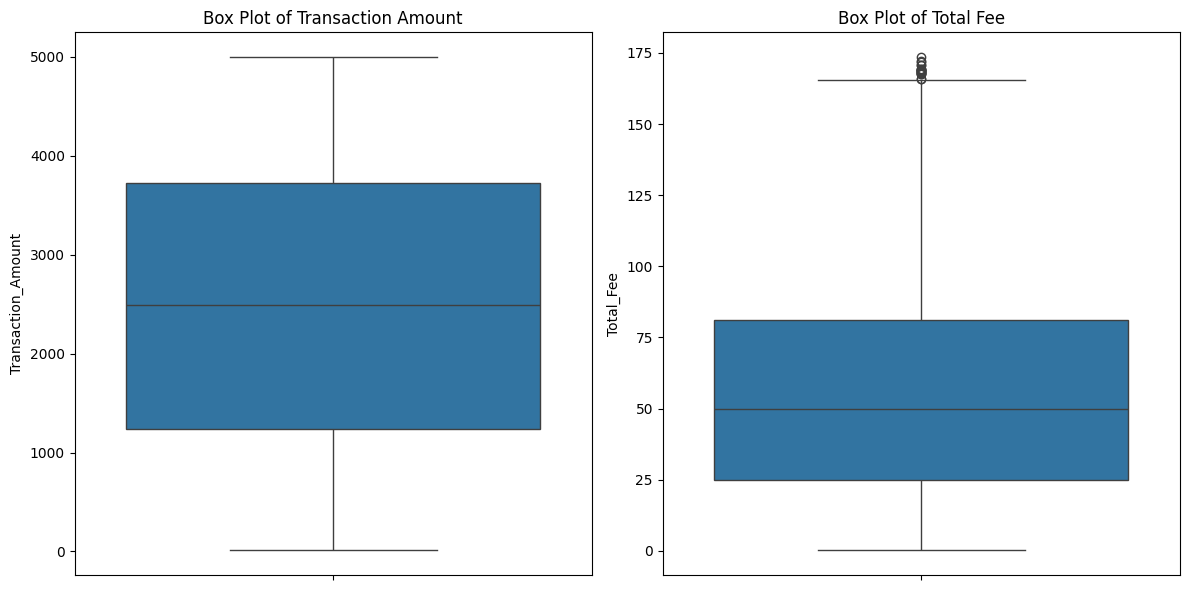

In [ ]:
# prompt: can you plot the above outliers in a box plot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'outliers' DataFrame is already created as in the previous response

# Create box plots for 'Transaction_Amount' and 'Total_Fee'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Box Plot of Transaction Amount')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Total_Fee'])
plt.title('Box Plot of Total Fee')

plt.tight_layout()
plt.show()

   Merchant_Category         Region  Merchant_Count
0         E-commerce           Asia             643
1         E-commerce         Europe             610
2         E-commerce  North America             643
3         E-commerce  South America             602
4      Food Services           Asia             607
5      Food Services         Europe             673
6      Food Services  North America             615
7      Food Services  South America             623
8             Retail           Asia             626
9             Retail         Europe             639
10            Retail  North America             594
11            Retail  South America             640
12            Travel           Asia             606
13            Travel         Europe             634
14            Travel  North America             621
15            Travel  South America             624


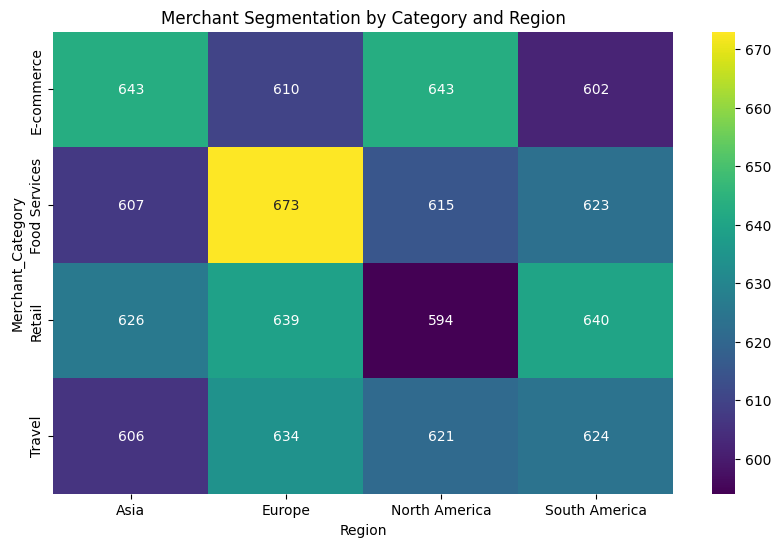

In [ ]:
# prompt: Merchant segmentation by category and region.

# Group by merchant category and region, then count unique merchants
merchant_segmentation = df.groupby(['Merchant_Category', 'Region'])['Merchant_ID'].nunique().reset_index(name='Merchant_Count')

# Display the segmentation
print(merchant_segmentation)

# For visualization (optional):
# You can create a pivot table and heatmap to visualize the merchant segmentation
merchant_pivot = merchant_segmentation.pivot(index='Merchant_Category', columns='Region', values='Merchant_Count')
plt.figure(figsize=(10, 6))
sns.heatmap(merchant_pivot, annot=True, fmt='d', cmap='viridis')
plt.title('Merchant Segmentation by Category and Region')
plt.show()

In [ ]:
# prompt: Average transaction size and fee percentage.

# Calculate the average transaction size and fee percentage
average_transaction_size = df['Transaction_Amount'].mean()
average_fee_percentage = df['Fee_Percentage'].mean()

print(f"Average Transaction Size: {average_transaction_size}")
print(f"Average Fee Percentage: {average_fee_percentage}")

Average Transaction Size: 2493.1675270000005
Average Fee Percentage: 2.2468220000000003


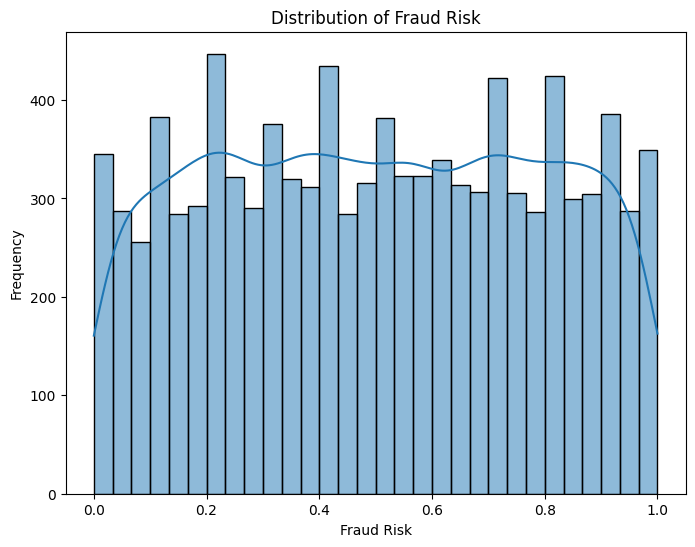

In [ ]:
# prompt: Fraud risk distribution.

# Visualize the distribution of fraud risk
plt.figure(figsize=(8, 6))
sns.histplot(df['Fraud_Risk'], bins=30, kde=True)
plt.title('Distribution of Fraud Risk')
plt.xlabel('Fraud Risk')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt: can you make below code in df

df

,Transaction_ID,Merchant_ID,Transaction_Amount,Transaction_Date,Merchant_Category,Region,Fraud_Risk,Fee_Percentage,Total_Fee,Transaction_Frequency
0,T0,b5ced021,306.07,2025-01-01,Retail,Europe,0.85,3.48,10.651236,1
1,T1,5356fb26,2915.34,2025-01-01,E-commerce,South America,0.85,3.47,101.162298,1
2,T2,ea307b6c,1119.94,2025-01-02,Retail,North America,0.23,2.19,24.526686,1
3,T3,177169f3,3252.47,2025-01-02,Retail,Europe,0.01,1.55,50.413285,1
4,T4,39a05151,3417.10,2025-01-02,Retail,South America,0.74,2.03,69.367130,1
...,...,...,...,...,...,...,...,...,...,...
9995,T9995,5583a4f7,3335.08,2025-01-01,Travel,South America,0.88,1.53,51.026724,1
9996,T9996,abf37369,3049.36,2025-01-02,E-commerce,North America,0.76,2.53,77.148808,1
9997,T9997,15a23a8b,3991.38,2025-01-02,Travel,Europe,0.94,1.11,44.304318,1
9998,T9998,b799c46a,2725.09,2025-01-02,Food Services,South America,0.82,3.33,90.745497,1


In [ ]:
merchant_summary = df.groupby("Merchant_Category").agg({
    "Transaction_Amount": ["sum", "mean", "count"],
    "Fraud_Risk": "mean",
    "Fee_Percentage": "mean"
}).reset_index()
merchant_summary.columns = ["Merchant_Category", "Total_Transaction_Amount", "Average_Transaction_Amount", "Transaction_Count", "Average_Fraud_Risk", "Average_Fee_Percentage"]
print(merchant_summary)


  Merchant_Category  Total_Transaction_Amount  Average_Transaction_Amount  \
0        E-commerce                6390062.76                 2558.071561   
1     Food Services                6242029.08                 2478.963098   
2            Retail                6196967.98                 2479.779104   
3            Travel                6102615.45                 2455.780865   

   Transaction_Count  Average_Fraud_Risk  Average_Fee_Percentage  
0               2498            0.501918                2.252646  
1               2518            0.492748                2.268145  
2               2499            0.503894                2.245002  
3               2485            0.509461                2.221191  


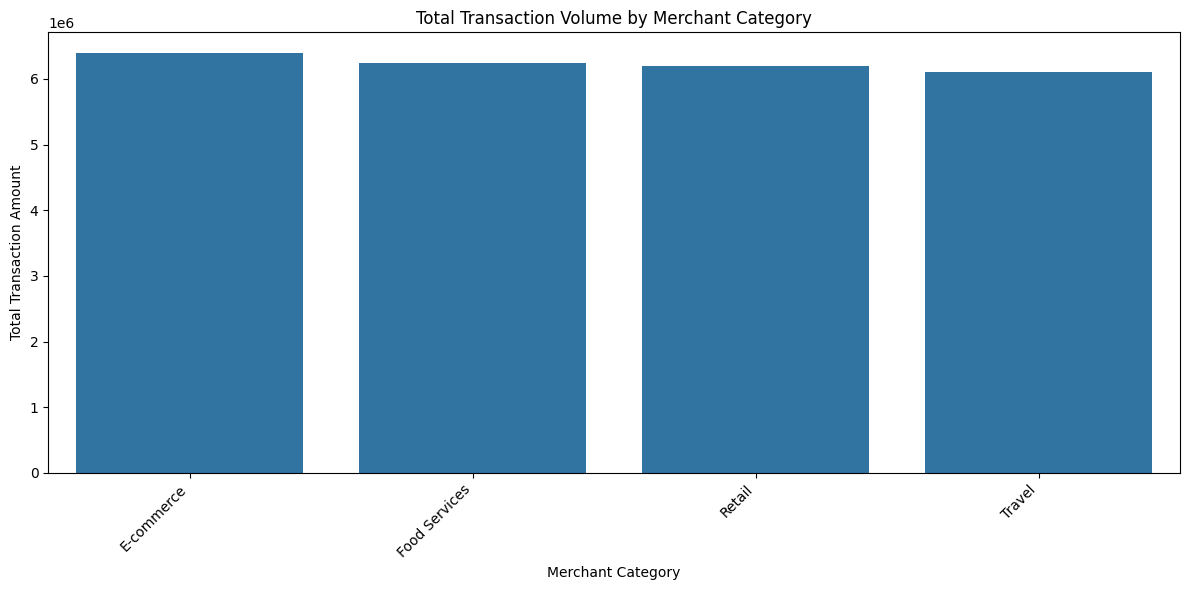

In [ ]:
# prompt: Transaction Volume by Merchant Category: Bar chart.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merchant_summary' DataFrame is already created as in the previous response

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Merchant_Category', y='Total_Transaction_Amount', data=merchant_summary)
plt.title('Total Transaction Volume by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

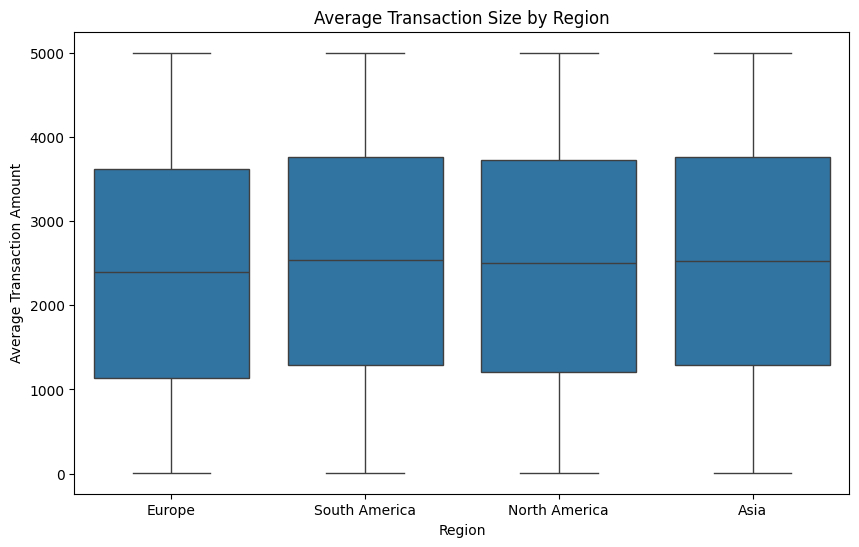

In [ ]:
# prompt: Average Transaction Size by Region: Boxplot or heat map.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average transaction size by region
average_transaction_by_region = df.groupby('Region')['Transaction_Amount'].mean().reset_index()

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Transaction_Amount', data=df)
plt.title('Average Transaction Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Amount')
plt.show()

<ipython-input-162-d98f2635024d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fraud_Risk'], shade=True)


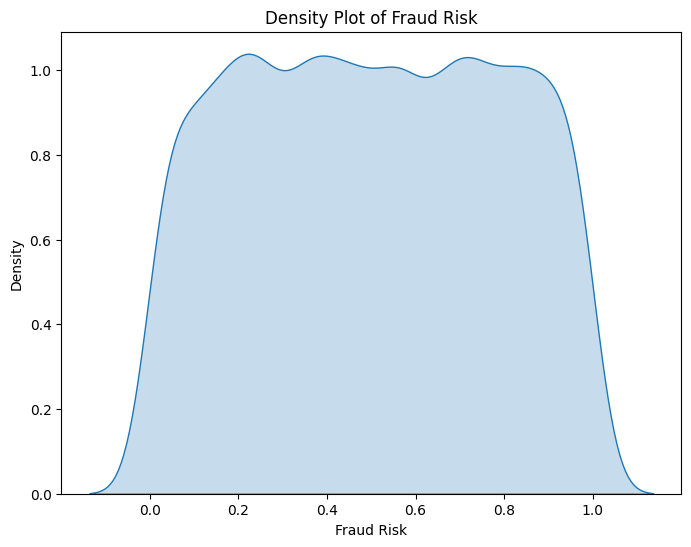

In [ ]:
# prompt: Fraud Risk Distribution: Histogram or density plot.

# Visualize the distribution of fraud risk using a density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Fraud_Risk'], shade=True)
plt.title('Density Plot of Fraud Risk')
plt.xlabel('Fraud Risk')
plt.ylabel('Density')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_data = df.groupby("Merchant_ID").agg({
    "Transaction_Amount": "sum",
    "Transaction_ID": "count",  # Frequency
    "Fraud_Risk": "mean"
}).rename(columns={"Transaction_ID": "Transaction_Frequency"})

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

print(clustering_data.head())


             Transaction_Amount  Transaction_Frequency  Fraud_Risk  Cluster
Merchant_ID                                                                
00078346                 278.68                      1        0.76        1
00142d8f                4891.26                      1        0.12        2
00216d82                2183.65                      1        0.26        2
00390fc3                4107.83                      1        0.43        2
003cb7e8                  15.59                      1        0.48        1


In [ ]:
import statsmodels.api as sm

X = df['Fee_Percentage']
Y = df['Transaction_Amount']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Transaction_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.872
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.171
Time:                        19:48:43   Log-Likelihood:                -86927.
No. Observations:               10000   AIC:                         1.739e+05
Df Residuals:                    9998   BIC:                         1.739e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2554.9371     47.392     53.

In [ ]:
df.head()

,Transaction_ID,Merchant_ID,Transaction_Amount,Transaction_Date,Merchant_Category,Region,Fraud_Risk,Fee_Percentage,Total_Fee,Transaction_Frequency
0,T0,b5ced021,306.07,2025-01-01,Retail,Europe,0.85,3.48,10.651236,1
1,T1,5356fb26,2915.34,2025-01-01,E-commerce,South America,0.85,3.47,101.162298,1
2,T2,ea307b6c,1119.94,2025-01-02,Retail,North America,0.23,2.19,24.526686,1
3,T3,177169f3,3252.47,2025-01-02,Retail,Europe,0.01,1.55,50.413285,1
4,T4,39a05151,3417.10,2025-01-02,Retail,South America,0.74,2.03,69.367130,1


In [ ]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Merchant_Category', 'Region'], drop_first=False)

# List of columns to convert to numeric
encoded_columns = [
    'Merchant_Category_E-commerce',
    'Merchant_Category_Food Services',
    'Merchant_Category_Retail',
    'Merchant_Category_Travel',
    'Region_Asia',
    'Region_Europe',
    'Region_North America',
    'Region_South America'
]

# Convert each column to numeric (int)
df_encoded[encoded_columns] = df_encoded[encoded_columns].astype(int)

# Verify the changes
print(df_encoded[encoded_columns].dtypes)
print(df_encoded.head())

Merchant_Category_E-commerce       int64
Merchant_Category_Food Services    int64
Merchant_Category_Retail           int64
Merchant_Category_Travel           int64
Region_Asia                        int64
Region_Europe                      int64
Region_North America               int64
Region_South America               int64
dtype: object
  Transaction_ID Merchant_ID  Transaction_Amount Transaction_Date  Fraud_Risk  \
0             T0    b5ced021              306.07       2025-01-01        0.85   
1             T1    5356fb26             2915.34       2025-01-01        0.85   
2             T2    ea307b6c             1119.94       2025-01-02        0.23   
3             T3    177169f3             3252.47       2025-01-02        0.01   
4             T4    39a05151             3417.10       2025-01-02        0.74   

   Fee_Percentage   Total_Fee  Transaction_Frequency  \
0            3.48   10.651236                      1   
1            3.47  101.162298                      1   
2  

In [ ]:

# Define the independent variables (including encoded categories)
X = df_encoded[['Fee_Percentage', 'Fraud_Risk', 'Transaction_Frequency',
                'Merchant_Category_Retail', 'Merchant_Category_E-commerce',
                'Region_Asia', 'Region_North America', 'Region_South America','Total_Fee','Merchant_Category_Food Services','Merchant_Category_Travel', 'Region_Europe']]

# Define the dependent variable
Y = df_encoded['Transaction_Amount']

#

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Transaction_Amount   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.092e+04
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:48:59   Log-Likelihood:                -75014.
No. Observations:               10000   AIC:                         1.500e+05
Df Residuals:                    9990   BIC:                         1.501e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Fee_Percen

In [ ]:
# prompt: Calculate the share of total revenue by merchant category and region.

# Calculate total revenue
df['Total_Revenue'] = df['Transaction_Amount'] - df['Total_Fee']

# Group by merchant category and region, then sum total revenue
revenue_by_category_region = df.groupby(['Merchant_Category', 'Region'])['Total_Revenue'].sum().reset_index()

# Calculate the share of total revenue
total_revenue = revenue_by_category_region['Total_Revenue'].sum()
revenue_by_category_region['Revenue_Share'] = (revenue_by_category_region['Total_Revenue'] / total_revenue) * 100

revenue_by_category_region

,Merchant_Category,Region,Total_Revenue,Revenue_Share
0,E-commerce,Asia,1.601501e+06,6.570820
1,E-commerce,Europe,1.483265e+06,6.085708
2,E-commerce,North America,1.627865e+06,6.678991
3,E-commerce,South America,1.534643e+06,6.296510
4,Food Services,Asia,1.497490e+06,6.144073
5,Food Services,Europe,1.589878e+06,6.523134
6,Food Services,North America,1.480660e+06,6.075019
7,Food Services,South America,1.532044e+06,6.285846
8,Retail,Asia,1.568822e+06,6.436742
9,Retail,Europe,1.494050e+06,6.129958


In [ ]:
# prompt: Analyze which merchants are likely to leave based on high fees or fraud risk.

# Identify merchants with high fees or fraud risk
high_fee_merchants = df[df['Fee_Percentage'] > df['Fee_Percentage'].quantile(0.9)]
high_fraud_risk_merchants = df[df['Fraud_Risk'] > df['Fraud_Risk'].quantile(0.9)]

# Combine merchants with high fees or high fraud risk
potential_churn_merchants = pd.concat([high_fee_merchants, high_fraud_risk_merchants]).drop_duplicates()

# Analyze potential churn merchants
print("Merchants likely to churn (high fees or fraud risk):")
print(potential_churn_merchants[['Merchant_ID', 'Merchant_Category', 'Region', 'Fee_Percentage', 'Fraud_Risk']])

# Further analysis can include:
# - Transaction frequency of these merchants
# - Total revenue generated by these merchants
# - Time series analysis of their transaction patterns to detect trends
# - Comparison with merchants who have not churned

Merchants likely to churn (high fees or fraud risk):
     Merchant_ID Merchant_Category         Region  Fee_Percentage  Fraud_Risk
0       b5ced021            Retail         Europe            3.48        0.85
1       5356fb26        E-commerce  South America            3.47        0.85
6       657be51d     Food Services  South America            3.30        0.79
29      d8983831            Travel  South America            3.45        0.42
39      73f528ca        E-commerce  North America            3.42        0.14
...          ...               ...            ...             ...         ...
9925    b55f3811            Retail           Asia            1.61        0.99
9943    2321eedc        E-commerce  South America            1.87        0.94
9977    5d3f6cfa            Travel  North America            1.81        0.94
9984    3c161d7b            Travel  North America            2.76        0.93
9997    15a23a8b            Travel         Europe            1.11        0.94

[1797 rows

In [ ]:
def assign_pricing_tier(row):
    if row['Cluster'] == 0:  # Example: High-value merchants
        return 1.5  # 1.5% fee
    elif row['Cluster'] == 1:  # Example: Low-value merchants
        return 2.5  # 2.5% fee
    else:  # Example: High-risk merchants
        return 3.5  # 3.5% fee

clustering_data['Base_Fee'] = clustering_data.apply(assign_pricing_tier, axis=1)
print(clustering_data[['Cluster', 'Base_Fee']].head())


             Cluster  Base_Fee
Merchant_ID                   
00078346           1       2.5
00142d8f           2       3.5
00216d82           2       3.5
00390fc3           2       3.5
003cb7e8           1       2.5


In [ ]:
df.head()

,Transaction_ID,Merchant_ID,Transaction_Amount,Transaction_Date,Merchant_Category,Region,Fraud_Risk,Fee_Percentage,Total_Fee,Transaction_Frequency,Total_Revenue
0,T0,b5ced021,306.07,2025-01-01,Retail,Europe,0.85,3.48,10.651236,1,295.418764
1,T1,5356fb26,2915.34,2025-01-01,E-commerce,South America,0.85,3.47,101.162298,1,2814.177702
2,T2,ea307b6c,1119.94,2025-01-02,Retail,North America,0.23,2.19,24.526686,1,1095.413314
3,T3,177169f3,3252.47,2025-01-02,Retail,Europe,0.01,1.55,50.413285,1,3202.056715
4,T4,39a05151,3417.10,2025-01-02,Retail,South America,0.74,2.03,69.367130,1,3347.732870


In [ ]:
# Calculate transaction volume per merchant
merchant_transaction_volume = df.groupby("Merchant_ID")['Transaction_ID'].count()
df_volume = merchant_transaction_volume.reset_index()
df_volume.columns = ['Merchant_ID', 'Transaction_Volume']
print(df_volume.head())


  Merchant_ID  Transaction_Volume
0    00078346                   1
1    00142d8f                   1
2    00216d82                   1
3    00390fc3                   1
4    003cb7e8                   1


In [ ]:
def dynamic_fee_adjustment(row):
    fee = row['Base_Fee']
    if row['Transaction_Frequency'] > 1000:  # High volume
        fee -= 0.5  # Discount for large volume
    if row['Fraud_Risk'] > 0.7:  # High fraud risk
        fee += 0.5  # Surcharge for high risk
    return max(fee, 0)  # Ensure no negative fees

clustering_data['Dynamic_Fee'] = clustering_data.apply(dynamic_fee_adjustment, axis=1)
print(clustering_data[['Base_Fee', 'Dynamic_Fee']].head())


             Base_Fee  Dynamic_Fee
Merchant_ID                       
00078346          2.5          3.0
00142d8f          3.5          3.5
00216d82          3.5          3.5
00390fc3          3.5          3.5
003cb7e8          2.5          2.5


In [ ]:
from scipy.optimize import minimize

# Define revenue function
def revenue(fees):
    # Example: Revenue = sum of (fees * transaction amounts)
    return -sum(fees * clustering_data['Transaction_Amount'])  # Negative for minimization

# Initial fee guesses
initial_fees = clustering_data['Base_Fee'].values

# Bounds for fees (e.g., between 1% and 5%)
bounds = [(1, 5) for _ in range(len(initial_fees))]

# Optimize
result = minimize(revenue, initial_fees, bounds=bounds)
optimized_fees = result.x
clustering_data['Optimized_Fee'] = optimized_fees


In [ ]:
clustering_data['Optimized_Fee']

,Optimized_Fee
Merchant_ID,
0001a8d3,5.0
0001e183,5.0
000695f8,5.0
0009b9f4,5.0
0015dcce,5.0
...,...
ffeee4d3,5.0
fff91697,5.0
fff9e8e2,5.0


In [ ]:
import pandas as pd

# Calculate Transaction Frequency (number of transactions per merchant)
df['Transaction_Frequency'] = df.groupby('Merchant_ID')['Transaction_ID'].transform('count')

# Define pricing scenarios
def simulate_pricing(row, strategy):
    if strategy == "base_pricing":
        fee = 2.5  # Flat fee
    elif strategy == "volume_discount":
        if row['Transaction_Frequency'] > 10000:
            fee = 2.0
        elif row['Transaction_Frequency'] > 1000:
            fee = 2.3
        else:
            fee = 2.5
    elif strategy == "risk_based":
        fee = 2.5 + (0.5 if row['Fraud_Risk'] > 0.7 else 0)
    else:  # Combined strategy
        fee = 2.5
        if row['Transaction_Frequency'] > 10000:
            fee -= 0.5
        if row['Fraud_Risk'] > 0.7:
            fee += 0.5
    return fee

# Apply scenarios
strategies = ["base_pricing", "volume_discount", "risk_based", "combined"]
results = []

for strategy in strategies:
    df[f'{strategy}_Fee'] = df.apply(simulate_pricing, strategy=strategy, axis=1)
    df[f'{strategy}_Revenue'] = df['Transaction_Amount'] * df['Transaction_Frequency'] * df[f'{strategy}_Fee'] / 100
    total_revenue = df[f'{strategy}_Revenue'].sum()
    avg_churn = df['Fraud_Risk'].mean()  # Assume churn correlates with fraud risk
    results.append({
        "Strategy": strategy,
        "Total_Revenue": total_revenue,
        "Average_Churn": avg_churn
    })

# Convert results to DataFrame
simulation_results = pd.DataFrame(results)
print(simulation_results)

# Save results
simulation_results.to_csv("pricing_simulation_results.csv", index=False)


          Strategy  Total_Revenue  Average_Churn
0     base_pricing   623291.88175       0.501977
1  volume_discount   623291.88175       0.501977
2       risk_based   660215.43765       0.501977
3         combined   660215.43765       0.501977
